**Import libraries**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import data**

In [84]:
# For google drive

#from google.colab import drive
#from google.colab import files

#drive.mount('/content/drive')
#data_dir = "/content/drive/My Drive/FYP/centaline/"

In [101]:
# Data directory

df = pd.DataFrame()

df = pd.read_csv("hang_seng_index.csv")
house_price_df = pd.read_csv("house_price.csv")
population_df = pd.read_csv("population.csv")
unemployment_rate_df = pd.read_csv("unemployment_rate.csv")
import_export_df = pd.read_csv("import_export.csv")
gdp_df = pd.read_csv("gdp.csv")
consumer_price_indices_df = pd.read_csv("ccp_index.csv")

df['house_price'] = house_price_df['average_price_per_sqft']
df['population'] = population_df['number']
df['unemployment_adjusted'] = unemployment_rate_df['unemployment_rate_seasonally_adjusted']
df['unemployment_not_adjusted'] = unemployment_rate_df['unemployment_rate_not_adjusted']
df['imports'] = import_export_df['imports']
df['total_exports'] = import_export_df['total_exports']
df['gdp'] = gdp_df['gdp']
df['ccp_index'] = consumer_price_indices_df['ccp_index']

# Data processing
df['gdp'] = df['gdp'].str.replace(',', '').astype(float)
df = df.drop(['open', 'high', 'low', 'adj_close', 'volume'], axis=1)
df = df.rename(columns={'close': 'hsi'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
year                         60 non-null int64
month                        60 non-null int64
hsi                          60 non-null float64
house_price                  60 non-null int64
population                   54 non-null float64
unemployment_adjusted        60 non-null float64
unemployment_not_adjusted    60 non-null float64
imports                      60 non-null int64
total_exports                60 non-null int64
gdp                          57 non-null float64
ccp_index                    60 non-null float64
dtypes: float64(6), int64(5)
memory usage: 5.3 KB


**Univariate analysis**

In [31]:
def univariate_analysis(feature_name):
    # Statistical summary
    print(df[feature_name].describe())

    # Histogram
    plt.figure(figsize=(8,4))
    sns.distplot(df[feature_name], axlabel=feature_name);

count       60.000000
mean     25867.160677
std       3067.358102
min      19111.929690
25%      23567.373048
50%      26111.099610
75%      28025.163085
max      32887.269530
Name: hsi, dtype: float64


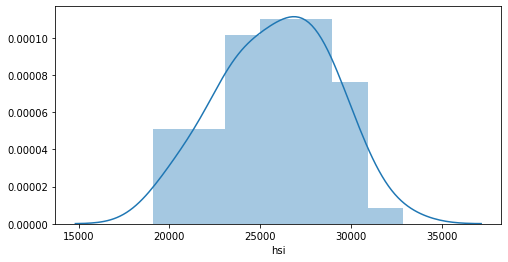

In [91]:
univariate_analysis('hsi')

**Bivariate analysis**

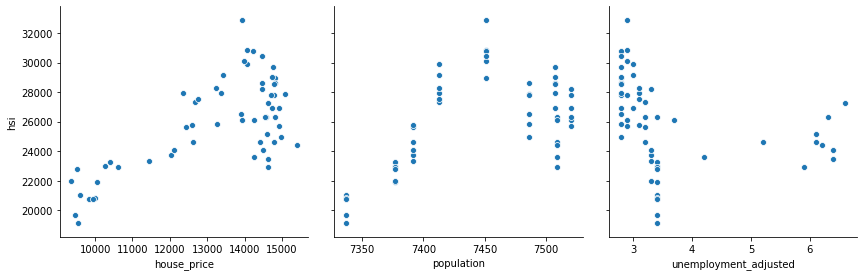

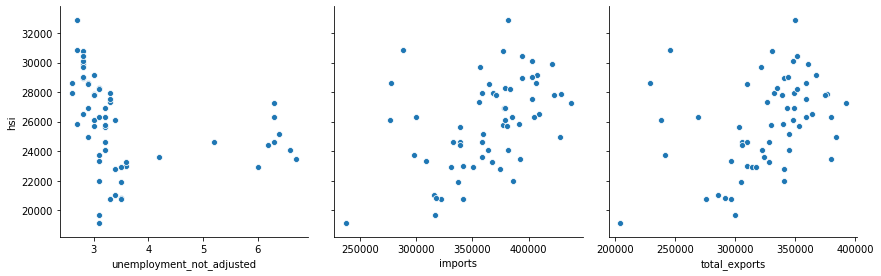

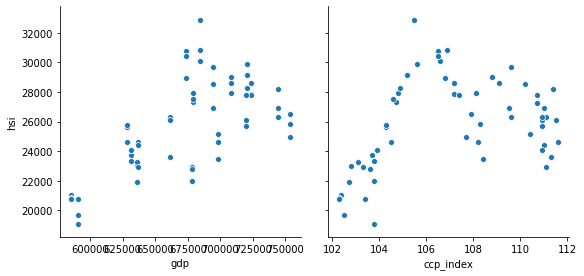

In [92]:
for i in range(3, len(df.columns), 3):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+3],
                y_vars=['hsi'],
                size=4)

In [105]:
def scatter_plot_with_regline(feature_name):
    x = df[feature_name]
    y = df['hsi']

    plt.scatter(x, y)
    plt.xticks(rotation=45)
    fig = sns.regplot(x=feature_name, y="hsi", data=df)

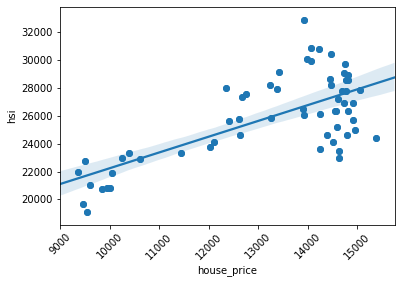

In [106]:
scatter_plot_with_regline("house_price")

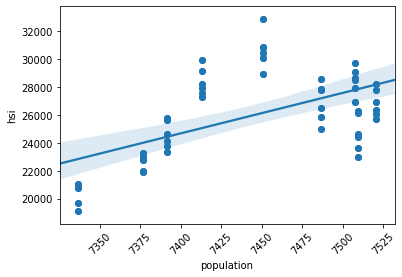

In [107]:
scatter_plot_with_regline("population")

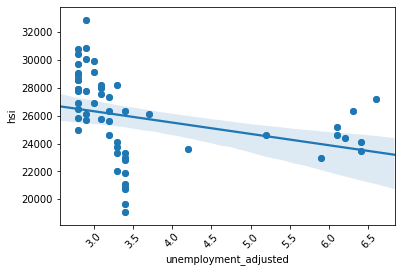

In [108]:
scatter_plot_with_regline("unemployment_adjusted")

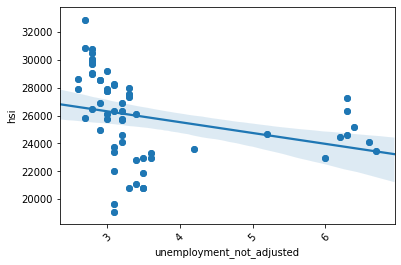

In [109]:
scatter_plot_with_regline("unemployment_not_adjusted")

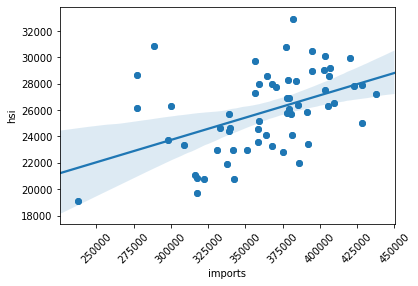

In [110]:
scatter_plot_with_regline("imports")

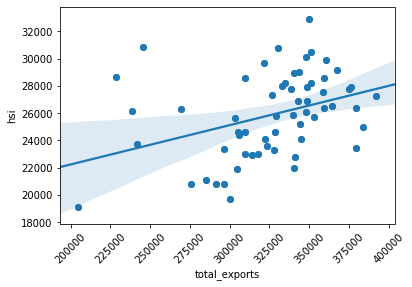

In [111]:
scatter_plot_with_regline("total_exports")

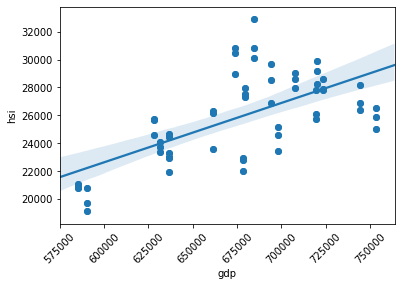

In [112]:
scatter_plot_with_regline("gdp")

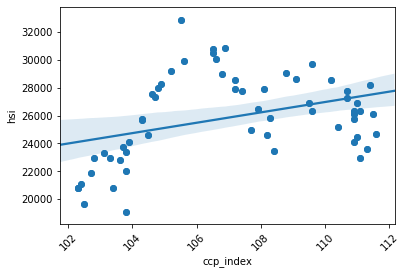

In [113]:
scatter_plot_with_regline("ccp_index")

**Correlation matrix and Heatmap**

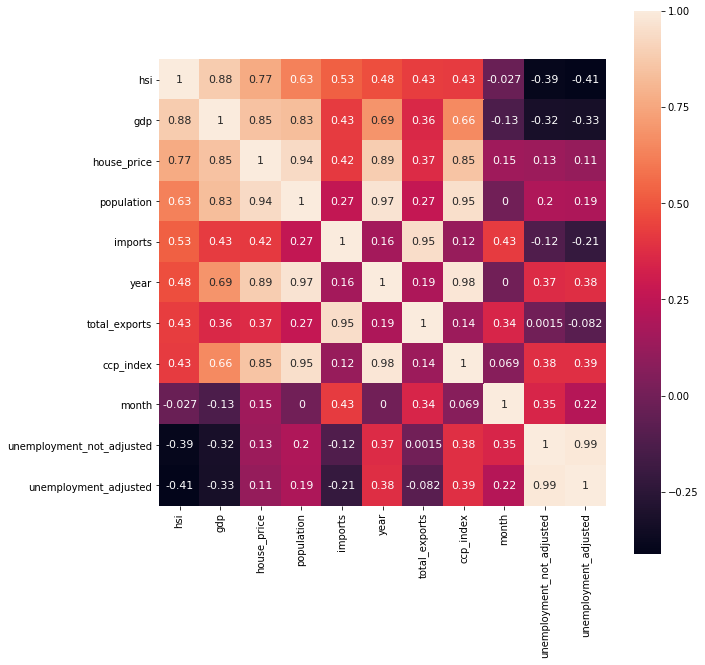

In [102]:
heatmap_df = df.copy()
heatmap_df = heatmap_df[(heatmap_df['year'] <= 2020) & (heatmap_df['month'] < 7)]

# Heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
cols = heatmap_df.corr().sort_values('hsi', ascending=False).index
cm = np.corrcoef(heatmap_df[cols].values.T)
hm = sns.heatmap(cm, annot=True, square=True, annot_kws={'size':11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()